In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('city_day.csv')

df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11769,Gurugram,2017-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11770,Gurugram,2017-01-27,114.14,NaN,7.27,9.68,NaN,NaN,0.61,3.30,16.15,3.72,37.22,NaN,NaN,NaN
11771,Gurugram,2017-01-28,104.16,NaN,7.21,9.98,NaN,NaN,0.60,4.06,15.84,2.32,23.17,NaN,248.0,Poor
11772,Gurugram,2017-01-29,119.53,NaN,6.44,9.58,NaN,NaN,0.67,5.17,19.08,3.30,32.99,NaN,260.0,Poor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        11774 non-null  object 
 1   Date        11774 non-null  object 
 2   PM2.5       10377 non-null  float64
 3   PM10        7350 non-null   float64
 4   NO          10648 non-null  float64
 5   NO2         10703 non-null  float64
 6   NOx         10444 non-null  float64
 7   NH3         8419 non-null   float64
 8   CO          10736 non-null  float64
 9   SO2         10548 non-null  float64
 10  O3          10264 non-null  float64
 11  Benzene     9753 non-null   float64
 12  Toluene     9213 non-null   float64
 13  Xylene      4563 non-null   float64
 14  AQI         10286 non-null  float64
 15  AQI_Bucket  10286 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,1397
PM10,4424
NO,1126
NO2,1071
NOx,1330
NH3,3355
CO,1038
SO2,1226


In [5]:
# Handle missing values (fill with median for numerical columns)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df['AQI_Bucket'] = df['AQI_Bucket'].fillna('Moderate')


In [6]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


##
correlation analysis

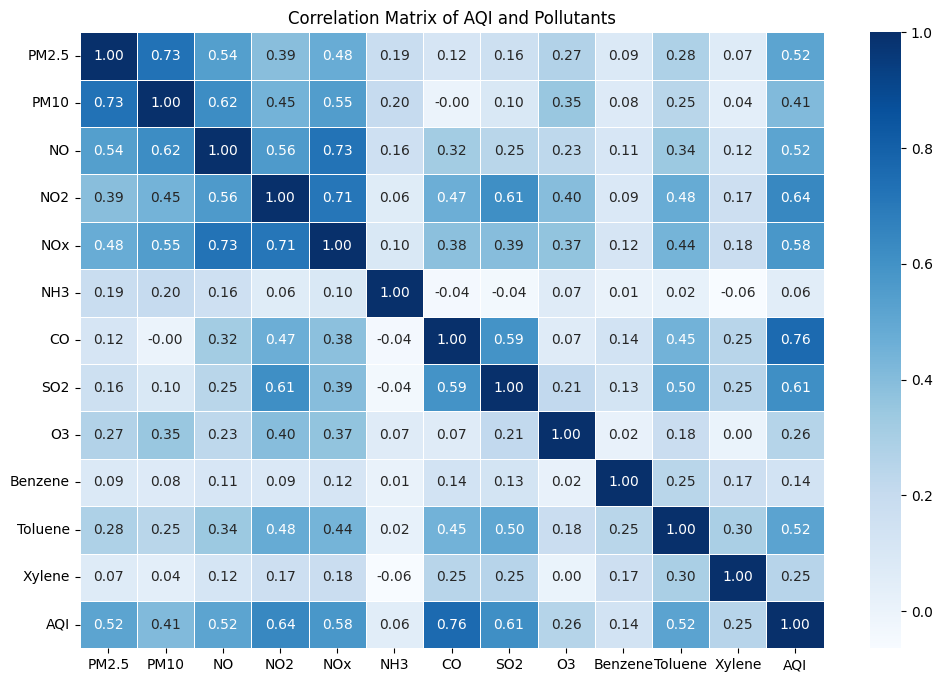

In [7]:
#
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix of AQI and Pollutants')
plt.show()

<ipython-input-9-62fc1893896e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df[df['City'].isin(top_cities)], palette='coolwarm')


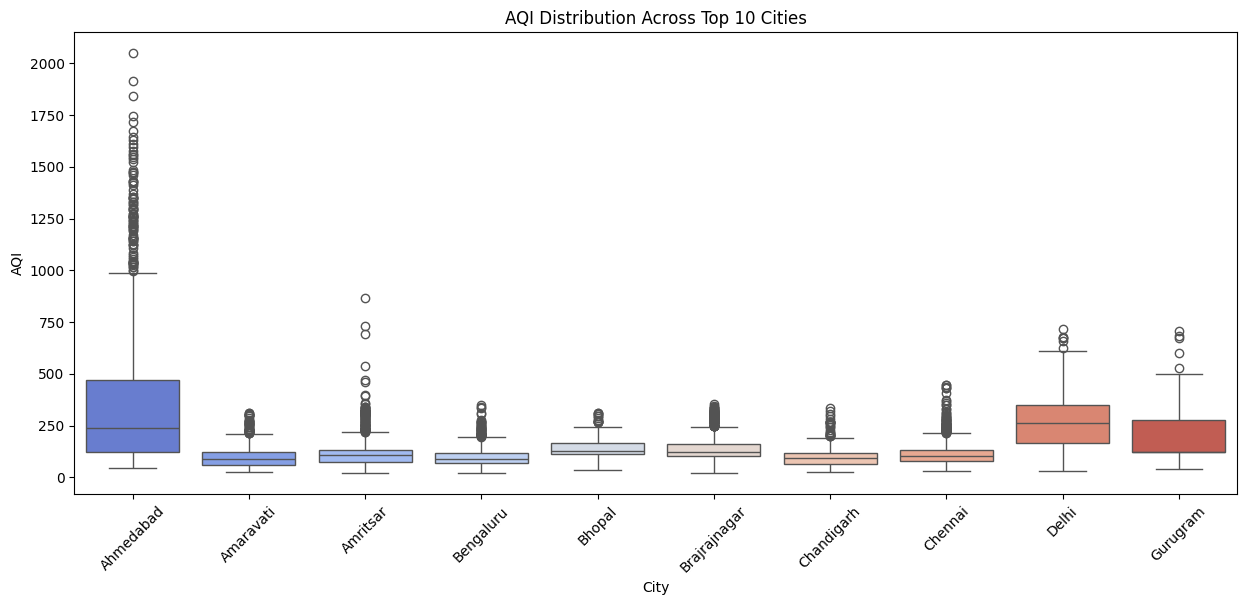

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Handle missing values (fill with median for numerical columns)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())



# City-wise AQI Analysis
plt.figure(figsize=(15, 6))
top_cities = df['City'].value_counts().index[:10]  # Selecting top 10 cities
sns.boxplot(x='City', y='AQI', data=df[df['City'].isin(top_cities)], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('AQI Distribution Across Top 10 Cities')
plt.show()

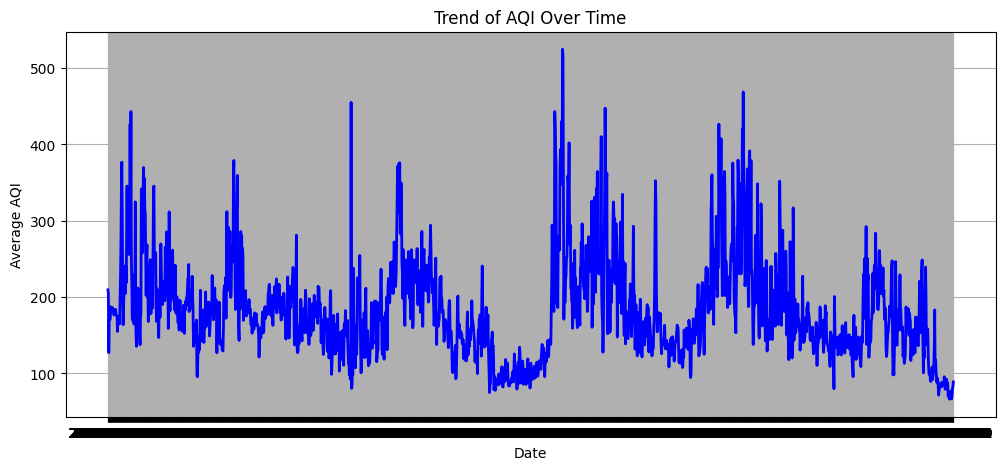

In [11]:
# Time-Series Analysis
df_time = df.groupby("Date")["AQI"].mean()
plt.figure(figsize=(12, 5))
plt.plot(df_time.index, df_time.values, color="blue", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("Trend of AQI Over Time")
plt.grid(True)
plt.show()

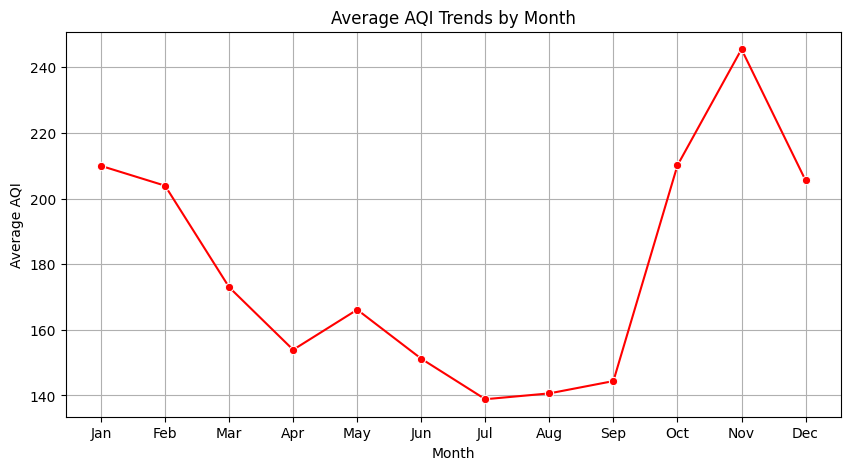

In [12]:
# Convert the 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
# Seasonal AQI Analysis
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
monthly_aqi = df.groupby("Month")["AQI"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_aqi.index, y=monthly_aqi.values, marker="o", color="red")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.title("Average AQI Trends by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

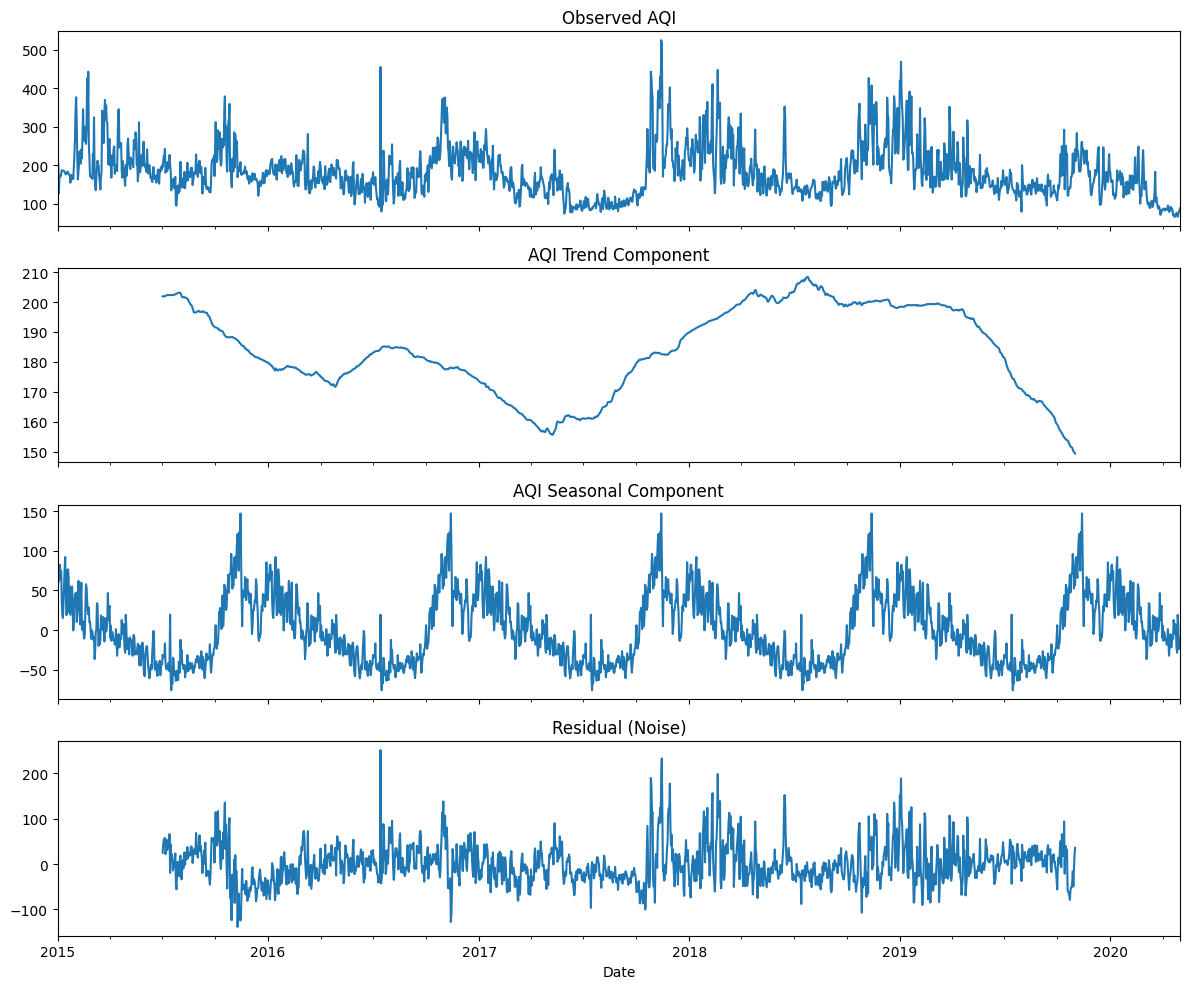

In [13]:

# Seasonal Decomposition
df_time_series = df.groupby("Date")["AQI"].mean()
decomposition = seasonal_decompose(df_time_series, model="additive", period=365)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title="Observed AQI")
decomposition.trend.plot(ax=axes[1], title="AQI Trend Component")
decomposition.seasonal.plot(ax=axes[2], title="AQI Seasonal Component")
decomposition.resid.plot(ax=axes[3], title="Residual (Noise)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

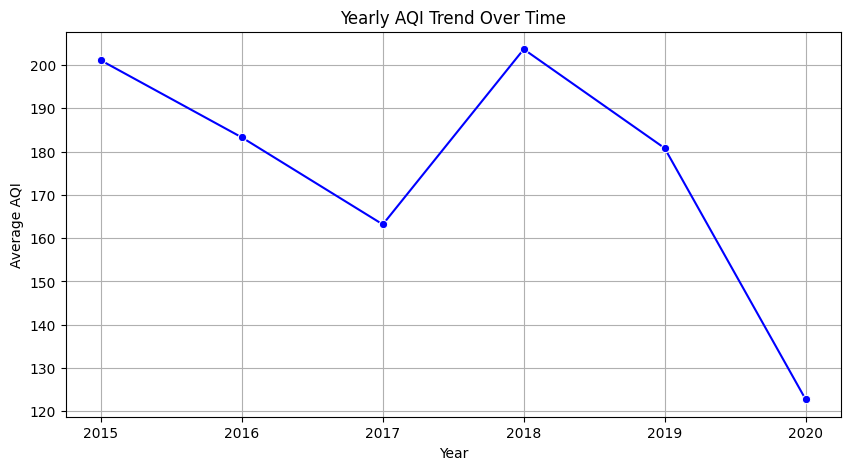

In [14]:
# Yearly AQI Trend
yearly_aqi = df.groupby("Year")["AQI"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.title("Yearly AQI Trend Over Time")
plt.grid(True)
plt.show()

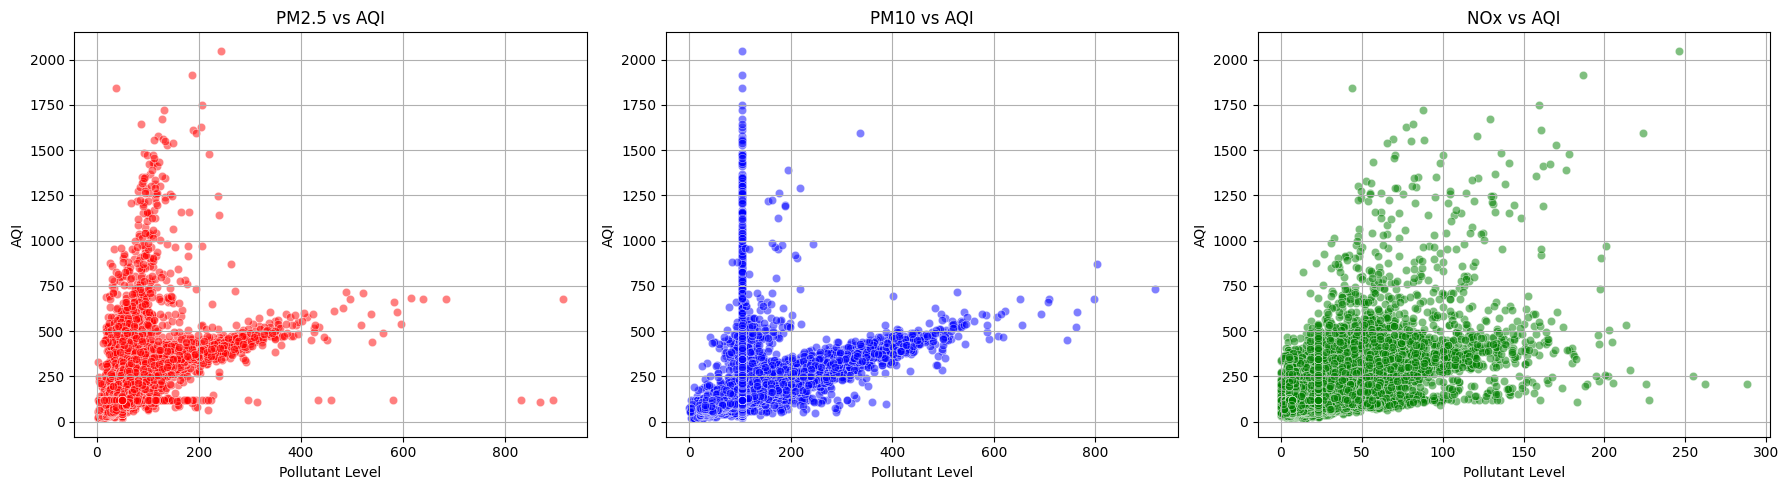

In [15]:
# Scatter plots for major pollutants vs AQI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PM2.5 vs AQI
sns.scatterplot(x=df["PM2.5"], y=df["AQI"], alpha=0.5, ax=axes[0], color="red")
axes[0].set_title("PM2.5 vs AQI")

# PM10 vs AQI
sns.scatterplot(x=df["PM10"], y=df["AQI"], alpha=0.5, ax=axes[1], color="blue")
axes[1].set_title("PM10 vs AQI")

# NOx vs AQI
sns.scatterplot(x=df["NOx"], y=df["AQI"], alpha=0.5, ax=axes[2], color="green")
axes[2].set_title("NOx vs AQI")

for ax in axes:
    ax.set_xlabel("Pollutant Level")
    ax.set_ylabel("AQI")
    ax.grid(True)

plt.tight_layout()
plt.show()

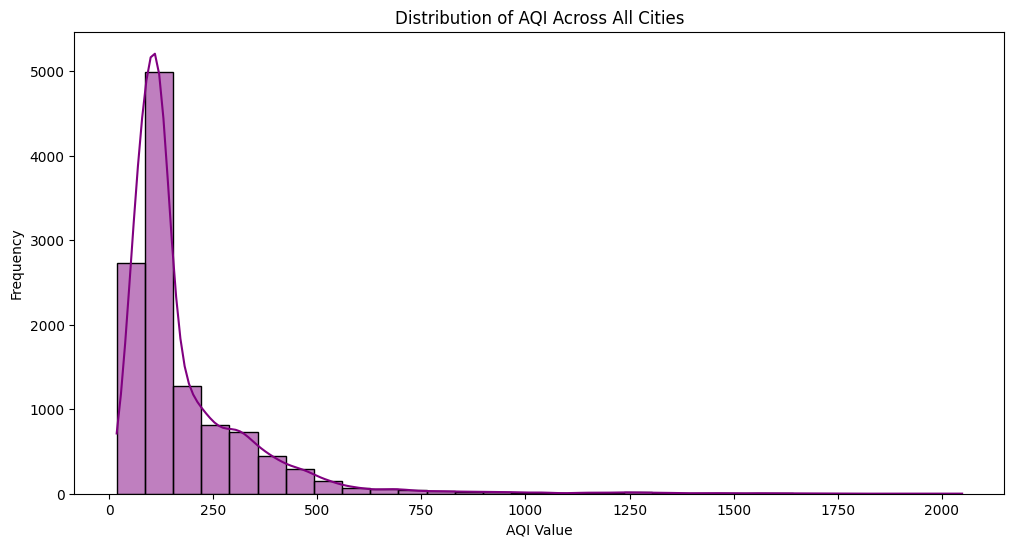

In [16]:
# AQI Distribution by City
plt.figure(figsize=(12, 6))
sns.histplot(df['AQI'], bins=30, kde=True, color='purple')
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title("Distribution of AQI Across All Cities")
plt.show()



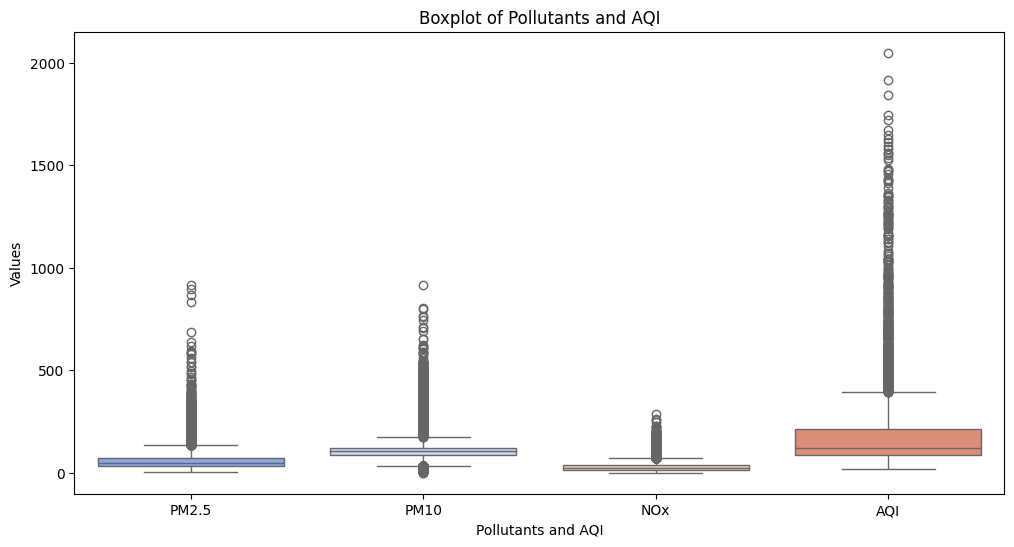

In [17]:
# Boxplot for Pollutants
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NOx', 'AQI']], palette='coolwarm')
plt.xlabel("Pollutants and AQI")
plt.ylabel("Values")
plt.title("Boxplot of Pollutants and AQI")
plt.show()

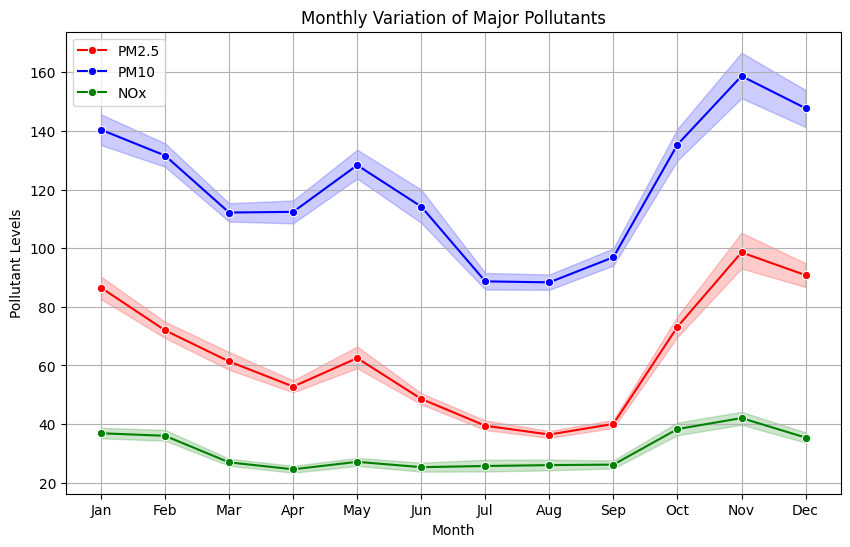

In [18]:

# Monthly variation of major pollutants
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Month"], y=df["PM2.5"], label="PM2.5", marker="o", color="red")
sns.lineplot(x=df["Month"], y=df["PM10"], label="PM10", marker="o", color="blue")
sns.lineplot(x=df["Month"], y=df["NOx"], label="NOx", marker="o", color="green")
plt.xlabel("Month")
plt.ylabel("Pollutant Levels")
plt.title("Monthly Variation of Major Pollutants")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.legend()
plt.show()



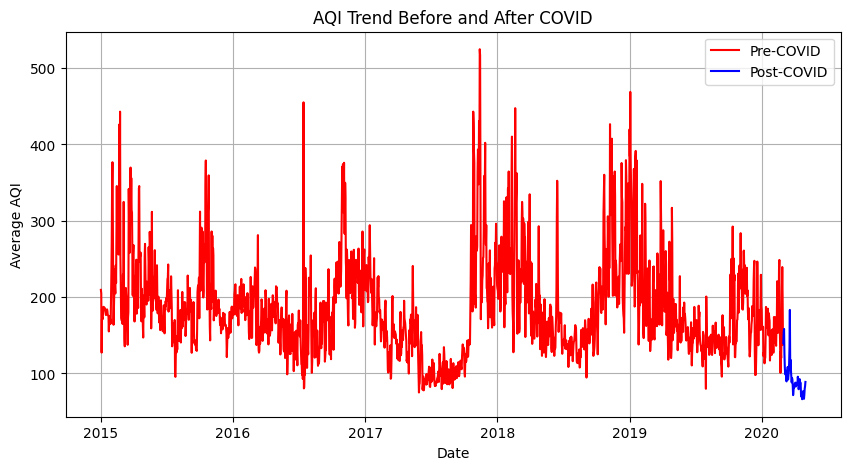

In [19]:
# Pollution Trend Before and After COVID
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(10, 5))
sns.lineplot(x=pre_covid.groupby("Date")["AQI"].mean().index, y=pre_covid.groupby("Date")["AQI"].mean(), label="Pre-COVID", color="red")
sns.lineplot(x=post_covid.groupby("Date")["AQI"].mean().index, y=post_covid.groupby("Date")["AQI"].mean(), label="Post-COVID", color="blue")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("AQI Trend Before and After COVID")
plt.legend()
plt.grid(True)
plt.show()

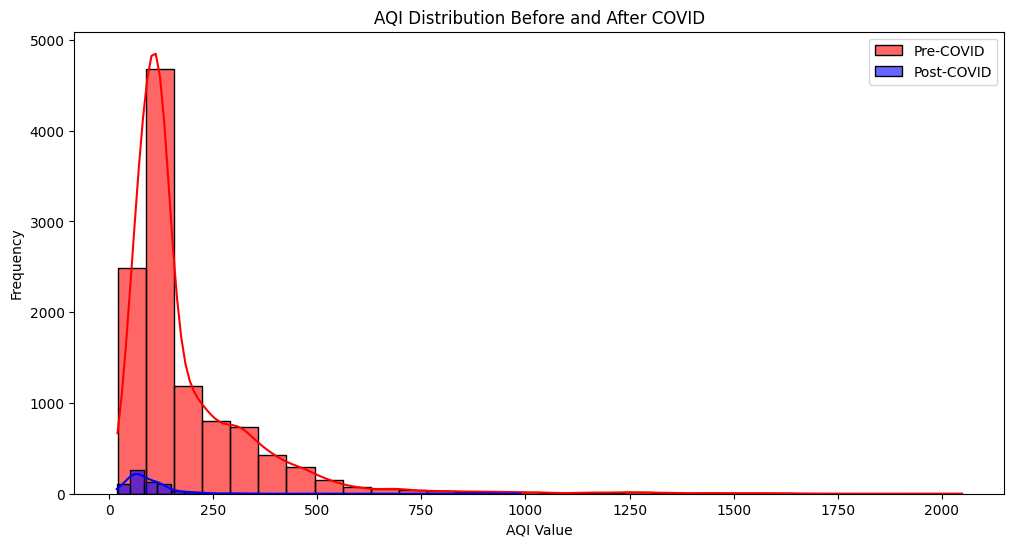

In [20]:
# AQI Distribution Before and After COVID
plt.figure(figsize=(12, 6))
sns.histplot(pre_covid["AQI"], bins=30, kde=True, color='red', label='Pre-COVID', alpha=0.6)
sns.histplot(post_covid["AQI"], bins=30, kde=True, color='blue', label='Post-COVID', alpha=0.6)
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title("AQI Distribution Before and After COVID")
plt.legend()
plt.show()

In [21]:
from google.colab import files

# Save the cleaned dataset to a CSV file
df.to_csv("cleaned_dataset.csv", index=False)

# Download the file
files.download("cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>